# Анализ гипотез для увеличения выручки интернет-магазина. A/B-тест.

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки интернет-магазина.

Цель: проанализировать результаты A/B-теста и сформировать выводы.

Задачи:
- Приоритизировать гипотезы методами ICE, RICE;
- Провести A/B-тест; 
- Анализ результатов и формирование выводов.

Таблица `hypothesis` содержит 9 гипотез со следующими данными:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Таблица `orders` содержит данные о заказах:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Таблица `visitors` содержит данные о пользователях, участвующих в тесте:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

In [1]:
#импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import scipy.stats as stats

## Приоретизация гипотез

### Предобработка данных

In [2]:
#загружаем датасет

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 130
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Как мы видим из данных, значения целые, пропусков и дубликатов нет. Однако стоит названия столбцов перевести в нижний регистр.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Данные готовы к анализу.

### Применение фреймворка ICE для приоритизации гипотез.

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
# рассчитываем ICE

hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 2)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20


In [6]:
#сортируем по убыванию приоритета

hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по фреймворку ICE: 8, 0, 7 и 6. 

### Применение фреймворка RICE для приоритизации гипотез. 

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
# рассчитываем RICE

hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'],2)
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


In [8]:
#сортируем по убыванию приоритета

hypothesis[['hypothesis','rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы: 7, 2, 0 и 6. 

На первом месте гипотеза под номером 7, поскольку ее параметр Reach равен 10, а у остальных гипотез он меньше. У гипотезы 2 также параметр Reach выше, чем у остальных гипотез, поэтому она на втором месте. 

### Изменение приоритизации гипотез при применении RICE вместо ICE.

In [9]:
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Вывод**

По фреймворку ICE наиболее приоритетными были гипотезы:

- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

А по фреймворку RICE наиболее приоритетными были гипотезы:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Приоритезация гипотез изменилась, потому что фреймворк RICE учитывает параметр Reach (скольких пользователей затронет изменение, которое вы хотите внести), и именно поэтому на первые места вышли гипотезы с наибольшим охватом пользователей. Важно отметить, что в обоих случаях на первые места вышли гипотезы под номерами 7, 0, 6. 

## Анализ A/B-теста

Был проведен A/B-тест и получены результаты, которые описаны в файлах `orders.csv` и `visitors.csv`.

### Предобработка данных

Изучим данные в файле `orders`.

In [10]:
#загружаем данные

orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Приведем столбцы к змеиному регистру.

In [12]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Переведем столбец с датой во временной формат.

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим данные на наличие дубликатов и пропусков.

In [14]:
orders.duplicated().sum()

0

In [15]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Проверим, корректно ли разделены пользователи по группам и нет ли пересечений.

In [16]:
group_a = orders.query('group == "A"') 
group_b = orders.query('group == "B"') 
  
# получаем список id пользователей, попавших в обе группы 
group_ab=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
group_ab

[8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830]

In [17]:
#посчитаем общее количество таких пользователей

len(group_ab)

58

В данных было 58 пользователей, которые попали в обе группы. Скорее всего, это может в дальнейшем сказаться на результатах анализа, поэтому таких пользователей лучше исключить. 

In [18]:
# перезаписываем orders

orders = orders[np.logical_not(orders['visitor_id'].isin(group_ab))]
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [19]:
# отбираем группы из данных с заказами для перепроверки
group_a = orders.query('group == "A"') 
group_b = orders.query('group == "B"') 
  
# получаем пользователей, попавших в обе группы 
group_ab = list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
len(group_ab)

0

Изучим данные в файле `visitors`.

In [20]:
#загружаем данные

visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [21]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Переведем столбец с датой во временной формат.

In [22]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим данные на наличие дубликатов и пропусков.

In [23]:
visitors.duplicated().sum()

0

In [24]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

**Вывод**

- Данные для анализа подготовлены.
- Изменен тип данных в колонках с датами на нужный формат.
- Дубикаты и пропуски отсутствуют.
- Из таблицы `orders` были удалены строки с пользователями, относящиеся к обоим группам.

### Кумулятивные метрики

Создадим датафрейм с кумулятивными данными `cumulativeData`: 
- `date` — дата;
- `group` — группа A/B-теста (A или B);
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [25]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [26]:
#cоберём агрегированные кумулятивные по дням данные о заказах

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [27]:
#получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [28]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [29]:
print(cumulativeData['date'].max())
print(cumulativeData['date'].min())

2019-08-31 00:00:00
2019-08-01 00:00:00


In [30]:
print(orders['date'].max())
print(orders['date'].min())

2019-08-31 00:00:00
2019-08-01 00:00:00


Минимальная и максимальная даты в кумулятивном датафрейме совпадают с исходными данными.

### График кумулятивной выручки по группам

Построим графики кумулятивной выручки по дням и группам A/B-тестирования. Для этого создадим переменные `cumulativeRevenueA` и `cumulativeRevenueB`, в которых сохраним данные о кумулятивном количестве заказов и выручке в группах A и B.

In [31]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

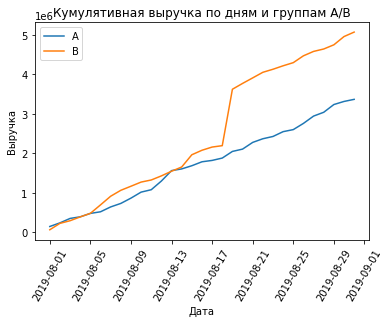

In [32]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title("Кумулятивная выручка по дням и группам A/B")
plt.legend() 
plt.xticks(rotation=60)
plt.show()

**Вывод**

- Выручка стабильно растет на протяжении всего теста в обоих группах. 
- В начале метрика выручки увеличивалась почти равномерно, но после 2019-08-17 выручка группы В резко увеличилась, обогнав выручку группы A. Возможно случилось резкое увеличение заказов в группе B или же появились слишком дорогие заказы. Затем выручки снова выравниваются и растут почти одинаково.

### График кумулятивного среднего чека по группам

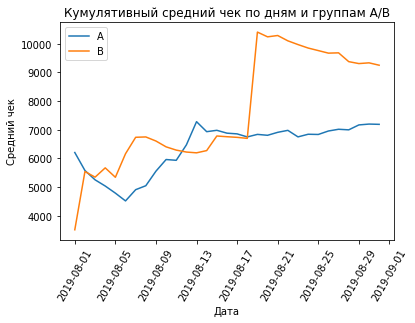

In [33]:
# Строим график среднего чека группы А

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title("Кумулятивный средний чек по дням и группам A/B")
plt.legend() 
plt.xticks(rotation=60)
plt.show()

**Вывод**

Как и на прошлом графике, после 2019-08-17 у группы В резко вырос кумулятивный средний чек. Но также заметно, что значение среднего чека после скачка продолжает колебаться.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

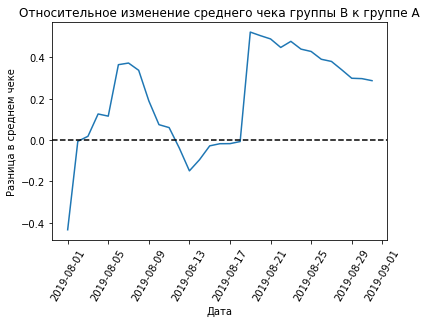

In [34]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Разница в среднем чеке')
plt.title("Относительное изменение среднего чека группы B к группе A")
plt.xticks(rotation=60)
plt.show()

**Вывод**

В нескольких точках график различия между сегментами резко «скачет», видимо тогда были совершены аномально крупные заказы. Особенно выделяется скачок после 2019-08-17. 

### График кумулятивного среднего количества заказов на посетителя по группам.

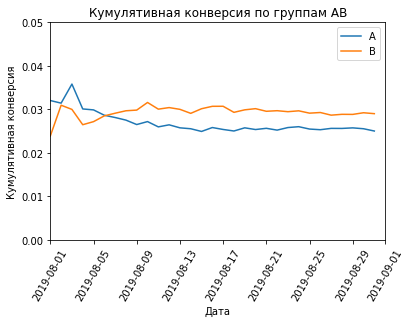

In [35]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title("Кумулятивная конверсия по группам AB")
plt.xticks(rotation=60)
plt.show()

**Вывод**

В начале группа А имела большую конверсию, но затем ее конверсия снизилась и выровнялась примерно около одного значения. Группа B, в свою очередь, выросла в конверсии и также установилась в пределах одного значения.

Иными словами, в начале значения групп колебались, но потом конверсия группы B вырвалась вперёд, а конверсия группы А просела.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

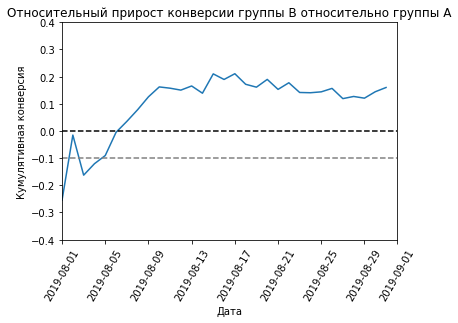

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.axis([pd.to_datetime('2019-08-01', format = '%Y-%m-%d'),
             pd.to_datetime('2019-09-01', format = '%Y-%m-%d'), -0.4, 0.4])
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=60)
plt.show()

**Вывод**

Исходя из графика, конверсия группы В вырвалась сильно вперёд, но ближе к концу теста немного снизилась. Тем не менее, на графике видно, что еще существует тенденция роста конверсии группы B.

### Анализ выбросов и всплесков. Точечный график количества заказов по пользователям.

Построим точечный график количества заказов по пользователям. Для этого подсчитаем количество заказов по пользователям.

In [37]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


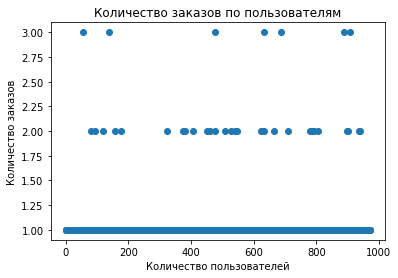

In [39]:
#точечный график количества заказов по пользователям

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.show()

**Вывод**

Наибольшее число пользователей совершает по 1 покупке. Однако есть пользователи с 2-3 заказами. Непонятно, считать их аномалиями или нет. Для этого посчитаем перцентили количества заказов на одного пользователя.

### Расчет 95-й и 99-й перцентили количества заказов на пользователя.

In [40]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Вывод**

Не более 5% пользователей оформляли заказов больше, чем 1, и не более 1% пользователей оформляли более 2 заказов.

Выберем 1 заказ на одного пользователя за "нормальное" числа заказов, и отсеем остальных пользователей.

### Точечный график стоимостей заказов.

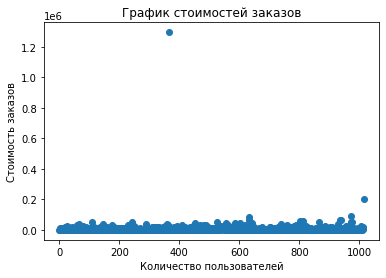

In [42]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.title("График стоимостей заказов")
plt.show()

**Вывод**

В данных наблюдается 2 выброса: в районе 1 200 000 и около 200 000. 

Посчитаем 95-й и 99-й перцентили стоимости заказов.

### Расчет 95-й и 99-й перцентили стоимости заказов. 

In [43]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод**

Не более 5% пользователей имели стоимость заказа дороже 26 785. Не более 1% пользователей оформили заказ дороже 53 904.

Границей для определения аномальных заказов следует назначить - 26 785.

###  Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы:

H0: Различий в среднем количестве заказов между группами нет.

H1: Различия в среднем между группами есть.

In [44]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами `visitor_id`, `transaction_id`. 

In [45]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [46]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.

In [47]:
print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительные различия: 0.160


**Вывод**

- p-value = 0.011 < 0.05. Нулевую гипотезу (статистически значимых различий в среднем числе заказов между группами нет) отвергаем.
- Среднее количество заказов между группами различается значимо.
- Относительный проигрыш группы A составляет 16%.

###  Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы:

H0: Различий в среднем чеке между группами нет.

H1: Различия в среднем чеке между группами есть. 

In [48]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительные различия: 0.287


**Вывод**

- p-value = 0.829 > 0.05. Значит, нулевую гипотезу о том, что различий в среднем чеке между группами нет, принимаем.
- Статистически значимых различий между группами в размере среднего чека нет.
- Средний чек группы B выше, чем у А, на 28,7%.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Ранее мы определили, что за аномальных пользователей примем тех, кто совершил более 1 заказа или совершил заказ стоимостью выше 26 785 руб. 

Сделаем срезы пользователей с числом заказов больше 1 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 26 785 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.

In [49]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64
86


Всего 86 аномальных пользователей. 

Узнаем, как их действия повлияли на результаты теста.

In [50]:
#подготовим выборки количества заказов по пользователям по группам теста

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Гипотезы

H0: Различий в среднем количестве заказов между группами нет.

H1: Различия в среднем между группами есть.

In [51]:
#применим статистический критерий Манна-Уитни

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.016
0.174


**Вывод**

Результаты по конверсии значимо не изменились. p-value стал чуть больше на 0,005 (на неочищенных данных p-value = 0.011), что не меняет наших выводов. Нулевую гипотезу отвергаем.

Проигрыш группы А на очищенных данных немного увеличился: 17,4%, а было 16% (на "сырых" данных).

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Гипотезы:

H0: Различий в среднем чеке между группами нет.

H1: Различия в среднем чеке между группами есть.

In [52]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.727
-0.034


**Вывод**

p-value (0.727) уменьшился почти на 0.1 (на "сырых" данных p-value был равен 0.829), но значение все еще значительно превышает 0,05, а значит нулевую гипотезу мы не можем отвергнуть. 

Кроме того, разница в средних чеках упала с 29% в пользу B до 3,4% в пользу группы A. Это также служит подтверждением того, что статистически значимых различий по этой метрике между группами нет. Скорее всего, выявленная разница на неочищенных данных была связана с выбросами, которые повлияли на результат.

## Выводы

Выводы:

- Есть статистически значимое различие по среднему количеству заказов (конверсии) между группами как по «сырым» данным, так и по данным после фильтрации аномалий. Преимущество у группы B на 16-17%;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов (конверсий) между группами сообщает, что результаты группы B лучше группы A и есть тенденция к небольшому улучшению;
- График различия среднего чека говорит о том, что скачки роста в группе B связаны с выбросами, затем метрика начинает снижаться к более естественным результатам;

Исходя из обнаруженных фактов, **тест следует остановить и признать его успешным в части улучшения среднего количества заказов (конверсии) в группе B**. В гипотезе о разнице в средних чеках между группами нельзя утверждать, что какая - либо из групп имеет значимое преимущество над другой.

Продолжать тест смысла нет, потому как колебания в графиках почти выровнялись, а значит разница между группами в конверсиях либо в среднем чеке существенно не изменится.